<a href="https://colab.research.google.com/github/minhtrong20130448/ML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ProjectML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ProjectML


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from prettytable import PrettyTable

Load data

In [ ]:
data = pd.read_csv('mushroom.csv', delimiter=';')
data.describe()

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
data.isnull().sum()

classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
data['stalk-root']

0         e
1         c
2         c
3         e
4         e
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 8124, dtype: object

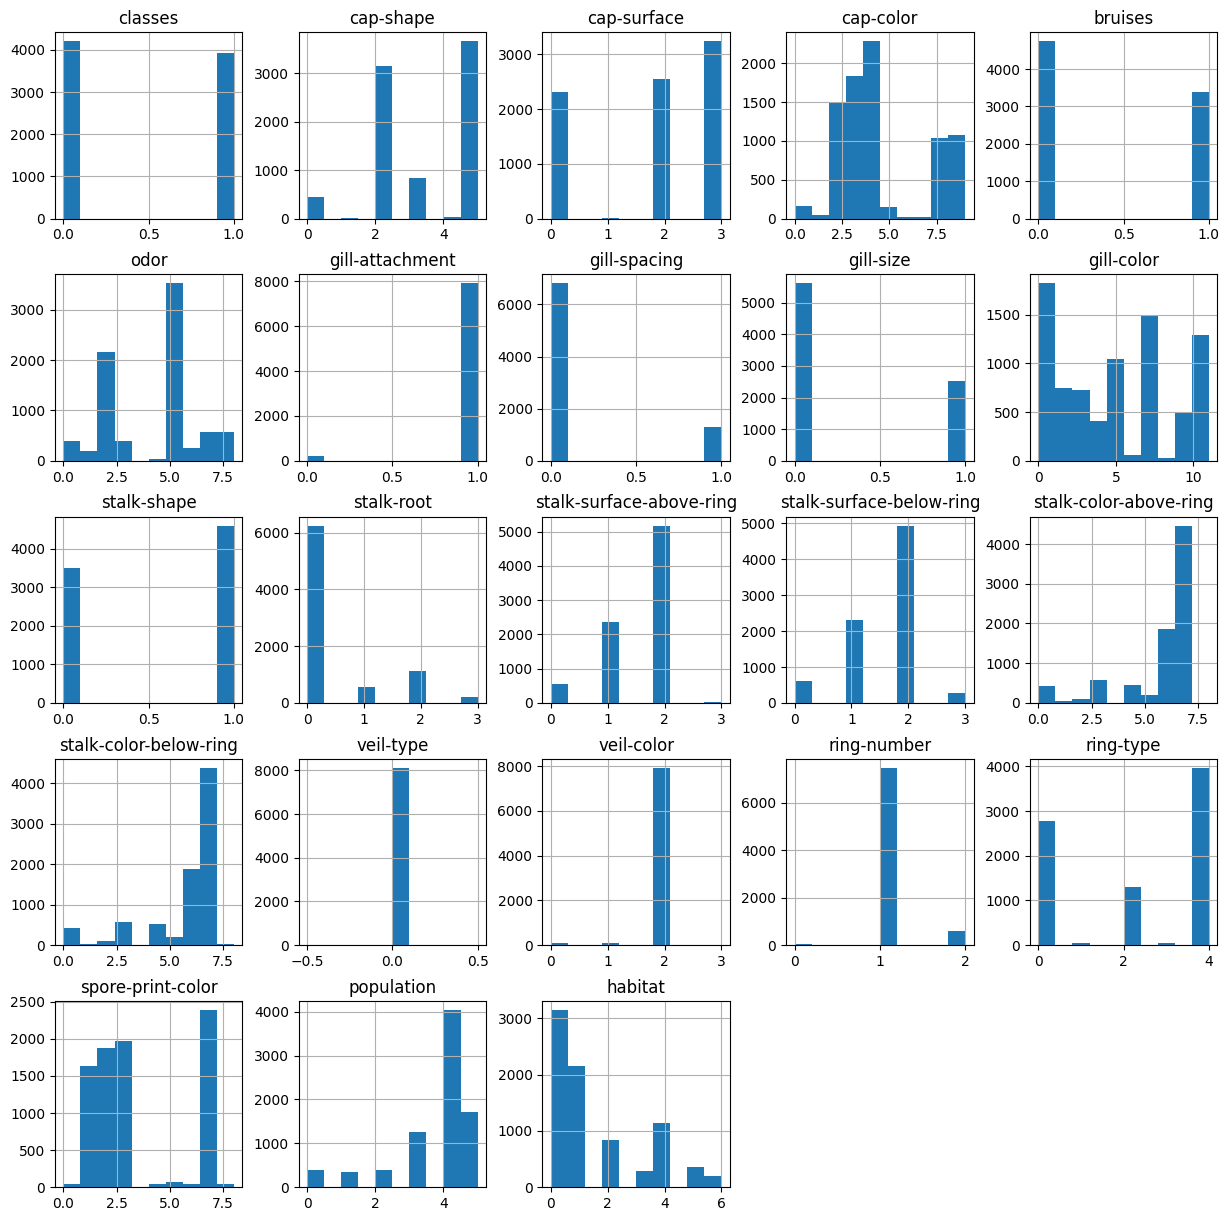

In [ ]:
data.hist(figsize=(15, 15))
plt.show()

# Preprocessing

* **Handle Missing**

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data['stalk-root'] = imputer.fit_transform(data[['stalk-root']])

In [ ]:
data.isnull().sum()

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

* **Encoder**


In [ ]:
encoder = LabelEncoder()

for column in range(len(data.columns)):
  data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])

print(data)

      classes  cap-shape  cap-surface  cap-color  bruises  odor  \
0           1          5            2          4        1     6   
1           0          5            2          9        1     0   
2           0          0            2          8        1     3   
3           1          5            3          8        1     6   
4           0          5            2          3        0     5   
...       ...        ...          ...        ...      ...   ...   
8119        0          3            2          4        0     5   
8120        0          5            2          4        0     5   
8121        0          2            2          4        0     5   
8122        1          3            3          4        0     8   
8123        0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0           4  .

* **Feature Scaling**

In [ ]:
X = data.drop('classes', axis=1);
y = data['classes']

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

print(X)

      cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0      1.029712     0.140128  -0.198250  1.185917  0.881938         0.162896   
1      1.029712     0.140128   1.765874  1.185917 -1.970316         0.162896   
2     -2.087047     0.140128   1.373049  1.185917 -0.544189         0.162896   
3      1.029712     0.953270   1.373049  1.185917  0.881938         0.162896   
4      1.029712     0.140128  -0.591075 -0.843230  0.406562         0.162896   
...         ...          ...        ...       ...       ...              ...   
8119  -0.216992     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8120   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8121  -0.840343     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8122  -0.216992     0.953270  -0.198250 -0.843230  1.832689         0.162896   
8123   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   

      gill-spacing  gill-size  gill-col

 * **Split Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training

* LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = round(metrics.accuracy_score(y_test, y_pred_lr),4)
precision_lr = round(metrics.precision_score(y_test, y_pred_lr),4)
recall_lr = round(metrics.recall_score(y_test, y_pred_lr),4)
f1_lr = round(metrics.f1_score(y_test, y_pred_lr),4)

print('acc: ', accuracy_lr)
print('pre: ', precision_lr)
print('recall: ', recall_lr)
print('f1: ', f1_lr)

scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(lr, X_train, y_train, scoring=scoring, cv=10)

print(sorted(scores.keys()))
print(np.mean(scores['fit_time']))
print(np.mean(scores['score_time']))
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_precision']))
print(np.mean(scores['test_recall']))
print(np.mean(scores['test_f1']))

acc:  0.9698
pre:  0.9657
recall:  0.9719
f1:  0.9688
['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall']
0.037816762924194336
0.00770258903503418
0.9664556121844257
0.963460759306412
0.9671262286074764
0.9652611821740635


In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
lr.fit(X_train, y_train)

param_grid = {'C': [0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2'], 
              'solver': ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']}

# Perform grid search to find the best hyperparameters for the model
grid_search = GridSearchCV(lr, param_grid, cv=10)
grid_search.fit(X_train, y_train)
y_pred_lr = grid_search.predict(X_test)

accuracy_lr = round(metrics.accuracy_score(y_test, y_pred_lr),4)
precision_lr = round(metrics.precision_score(y_test, y_pred_lr),4)
recall_lr = round(metrics.recall_score(y_test, y_pred_lr),4)
f1_lr = round(metrics.f1_score(y_test, y_pred_lr),4)


print('acc: ', accuracy_lr)
print('pre: ', precision_lr)
print('recall: ', recall_lr)
print('f1: ', f1_lr)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Train accuracy: {grid_search.best_score_}')
print(f'Test accuracy: {grid_search.score(X_test, y_test)}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

acc:  0.9674
pre:  0.9642
recall:  0.9701
f1:  0.9671
Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
Train accuracy: 0.9661495792343251
Test accuracy: 0.9673846153846154


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


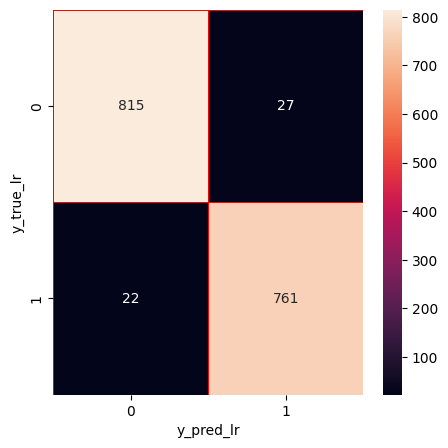

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

* SVM

In [ ]:
svm = SVC(C=1.0, kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = round(metrics.accuracy_score(y_test, y_pred_svm),4)
precision_svm = round(metrics.precision_score(y_test, y_pred_svm),4)
recall_svm = round(metrics.recall_score(y_test, y_pred_svm),4)
f1_svm = round(metrics.f1_score(y_test, y_pred_svm),4)

print(accuracy_svm)
print(precision_svm)
print(recall_svm)
print(f1_svm)

scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(svm, X_train, y_train, scoring=scoring, cv=10)

print(sorted(scores.keys()))
print(scores['fit_time'])
print(scores['score_time'])
print(scores['test_accuracy'])
print(scores['test_precision'])
print(scores['test_recall'])
print(scores['test_f1'])

1.0
1.0
1.0
1.0
['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall']
[0.12940073 0.12788272 0.12592888 0.12536192 0.13188195 0.12169337
 0.12616348 0.12950706 0.12648463 0.12120414]
[0.02463794 0.02339983 0.01915836 0.01906466 0.01886439 0.02021551
 0.01966238 0.01947188 0.0190053  0.01899672]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


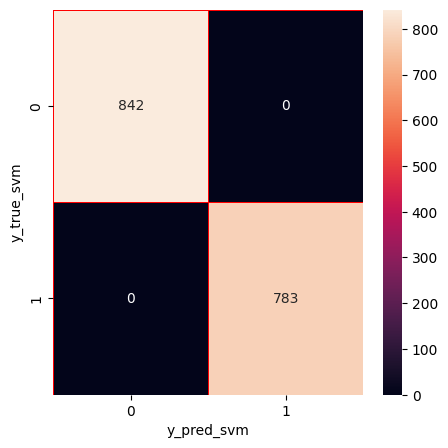

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_true_svm")
plt.show()

* kNN

In [ ]:
best_K = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    if knn.score(X_test, y_test) > best_score:
        best_score = knn.score(X_train, y_train)
        best_K = i

knn = KNeighborsClassifier(n_neighbors=best_K)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = round(metrics.accuracy_score(y_test, y_pred_knn),4)
precision_knn = round(metrics.precision_score(y_test, y_pred_knn),4)
recall_knn = round(metrics.recall_score(y_test, y_pred_knn),4)
f1_knn = round(metrics.f1_score(y_test, y_pred_knn),4)

print(accuracy_knn)
print(precision_knn)
print(recall_knn)
print(f1_knn)

1.0
1.0
1.0
1.0


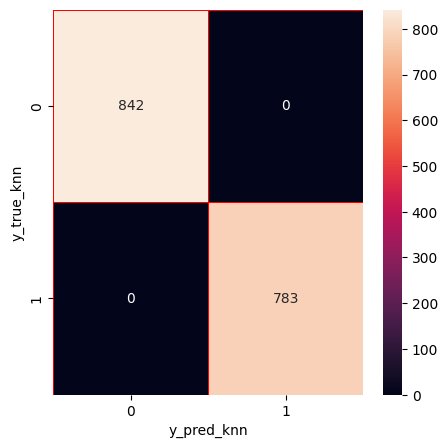

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_true_knn")
plt.show()

* Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = round(metrics.accuracy_score(y_test, y_pred_nb),4)
precision_nb = round(metrics.precision_score(y_test, y_pred_nb),4)
recall_nb = round(metrics.recall_score(y_test, y_pred_nb),4)
f1_nb = round(metrics.f1_score(y_test, y_pred_nb),4)

print(accuracy_nb)
print(precision_nb)
print(recall_nb)
print(f1_nb)

0.8923
0.8716
0.9106
0.8907


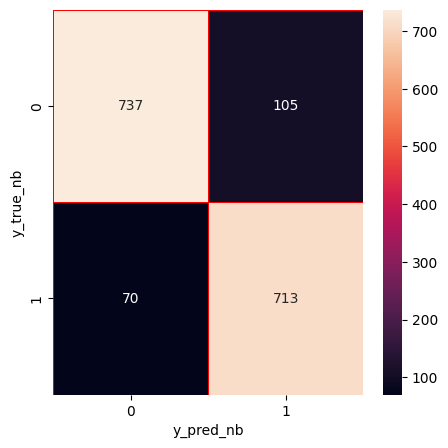

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

In [ ]:
data

,classes,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


* Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
accuracy_rf = round(metrics.accuracy_score(y_test, y_pred_rf),4)
precision_rf = round(metrics.precision_score(y_test, y_pred_rf),4)
recall_rf = round(metrics.recall_score(y_test, y_pred_rf),4)
f1_rf = round(metrics.f1_score(y_test, y_pred_rf),4)

print(accuracy_rf)
print(precision_rf)
print(recall_rf)
print(f1_rf)

1.0
1.0
1.0
1.0


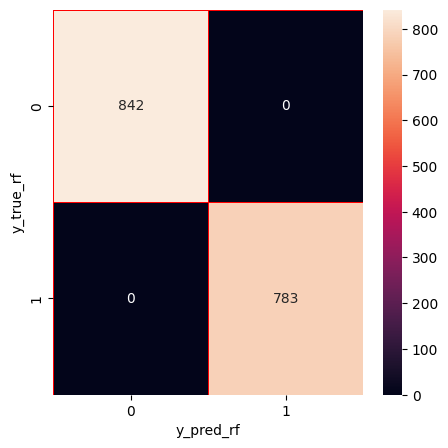

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

* Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = round(metrics.accuracy_score(y_test, y_pred_dt),4)
precision_dt =  round(metrics.precision_score(y_test, y_pred_dt),4)
recall_dt =  round(metrics.recall_score(y_test, y_pred_dt),4)
f1_dt =  round(metrics.f1_score(y_test, y_pred_dt),4)

print(accuracy_dt)
print(precision_dt)
print(recall_dt)
print(f1_dt)

1.0
1.0
1.0
1.0


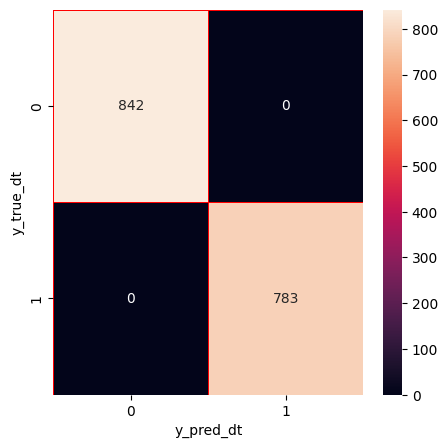

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.show()

* Neural network

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(128,128))
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

accuracy_nn = round(metrics.accuracy_score(y_test, y_pred_nn),4)
precision_nn =  round(metrics.precision_score(y_test, y_pred_nn),4)
recall_nn =  round(metrics.recall_score(y_test, y_pred_nn),4)
f1_nn =  round(metrics.f1_score(y_test, y_pred_nn),4)

print(accuracy_nn)
print(precision_nn)
print(recall_nn)
print(f1_nn)

1.0
1.0
1.0
1.0


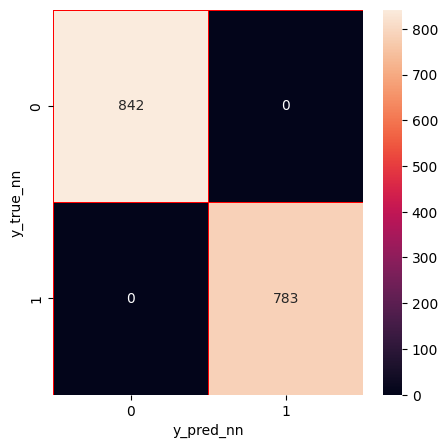

In [ ]:
cm = confusion_matrix(y_test, y_pred_nn)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nn")
plt.ylabel("y_true_nn")
plt.show()

<Axes: >

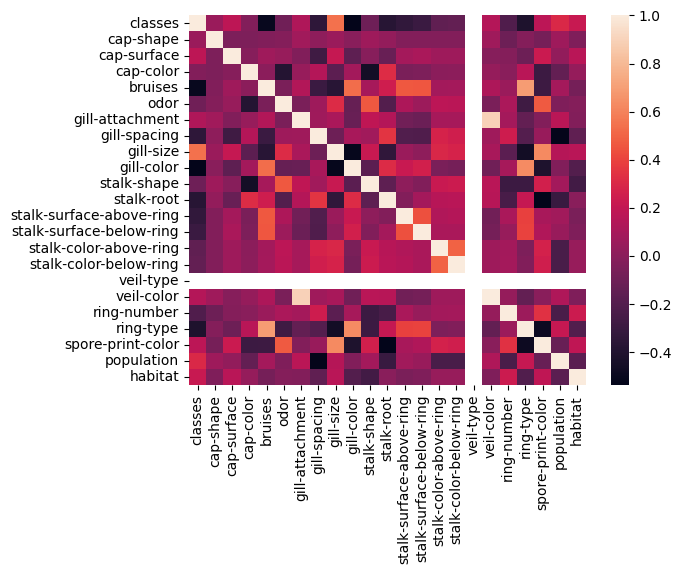

In [ ]:
corr = data.corr()

sns.heatmap(corr)

# Đánh giá

* Bảng đánh giá

In [ ]:
table = PrettyTable(['Thuật toán','Accuracy','Pre','Recall','F1'])
table.add_row(['Neural network', accuracy_nn, precision_nn, recall_nn, f1_nn])
table.add_row(['kNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
table.add_row(['SVM', accuracy_svm, precision_svm, recall_svm, f1_svm])
table.add_row(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf])
table.add_row(['Decision Tree', accuracy_dt, precision_dt, recall_dt, f1_dt])
table.add_row(['Logistic', accuracy_lr, precision_lr, recall_lr, f1_lr])
table.add_row(['Naive Bayes', accuracy_nb, precision_nb, recall_nb, f1_nb])
print(table)

+----------------+----------+--------+--------+--------+
|   Thuật toán   | Accuracy |  Pre   | Recall |   F1   |
+----------------+----------+--------+--------+--------+
| Neural network |   1.0    |  1.0   |  1.0   |  1.0   |
|      kNN       |   1.0    |  1.0   |  1.0   |  1.0   |
|      SVM       |   1.0    |  1.0   |  1.0   |  1.0   |
| Random Forest  |   1.0    |  1.0   |  1.0   |  1.0   |
| Decision Tree  |   1.0    |  1.0   |  1.0   |  1.0   |
|    Logistic    |  0.9698  | 0.9657 | 0.9719 | 0.9688 |
|  Naive Bayes   |  0.8923  | 0.8716 | 0.9106 | 0.8907 |
+----------------+----------+--------+--------+--------+


* Biểu đồ đánh giá

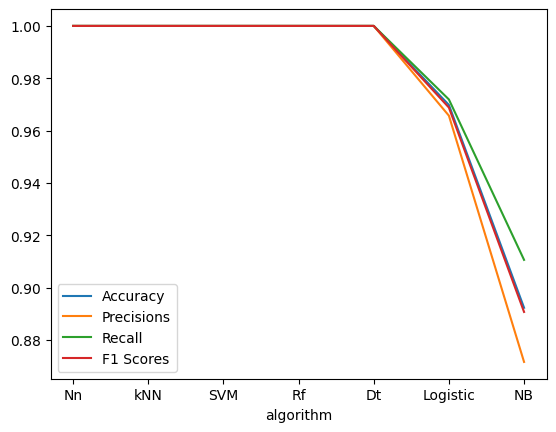

In [ ]:
algorithm = ['Nn', 'kNN','SVM','Rf', 'Dt','Logistic','NB']
values_accs = [accuracy_nn, accuracy_knn, accuracy_svm, accuracy_rf, accuracy_dt, accuracy_lr, accuracy_nb]
values_pres = [precision_nn, precision_knn, precision_svm, precision_rf, precision_dt, precision_lr, precision_nb]
values_recalls = [recall_nn, recall_knn, recall_svm, recall_rf, recall_dt, recall_lr, recall_nb]
values_f1s = [f1_nn, f1_knn, f1_svm, f1_rf, f1_dt, f1_lr, f1_nb]

plt.plot(algorithm, values_accs, label="Accuracy")
plt.plot(algorithm, values_pres, label="Precisions")
plt.plot(algorithm, values_recalls, label="Recall")
plt.plot(algorithm, values_f1s, label="F1 Scores")
plt.xlabel("algorithm")
plt.legend()